In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score

from transformers import pipeline

import torch

In [2]:
classifier = pipeline("sentiment-analysis")
type(classifier)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


transformers.pipelines.text_classification.TextClassificationPipeline

In [3]:
classifier("This is a great documentry on animals")

[{'label': 'POSITIVE', 'score': 0.9997995495796204}]

In [4]:
classifier("This was the great match ever we seen")

[{'label': 'POSITIVE', 'score': 0.9997575879096985}]

In [5]:
classifier("This is so sad that india will not qualified for finals")

[{'label': 'NEGATIVE', 'score': 0.9996955394744873}]

In [6]:
classifier("This thing was ok")

[{'label': 'POSITIVE', 'score': 0.9996815919876099}]

In [7]:
classifier("This is actually good but not great")

[{'label': 'NEGATIVE', 'score': 0.7903639674186707}]

In [8]:
classifier("I had a wonderful time at the concert last night!")

[{'label': 'POSITIVE', 'score': 0.9998700618743896}]

In [9]:
classifier("The customer service was incredibly helpful and friendly.")

[{'label': 'POSITIVE', 'score': 0.9998261332511902}]

In [10]:
classifier("I went to the store to buy groceries yesterday.")

[{'label': 'NEGATIVE', 'score': 0.9791401624679565}]

In [11]:
classifier("I’m really disappointed with the lack of response from support.")

[{'label': 'NEGATIVE', 'score': 0.9997784495353699}]

In [12]:
classifier("The product looks great but is way too expensive for what it offers.")

[{'label': 'NEGATIVE', 'score': 0.9995249509811401}]

In [13]:
airline_tweets = pd.read_csv("Tweets.csv")
airline_tweets.head(9)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)


In [14]:
df = airline_tweets[["airline_sentiment", "text"]]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


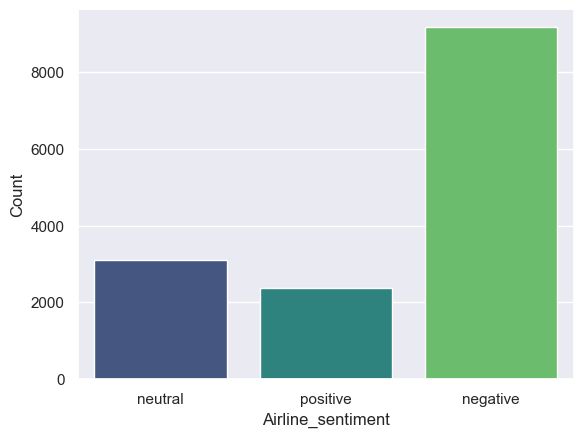

In [15]:
sns.countplot(df, x="airline_sentiment", palette = "viridis");
plt.xlabel("Airline_sentiment")
plt.ylabel("Count")
plt.show()


In [16]:
df = df[df["airline_sentiment"] != "neutral"]

In [17]:
df['target']= df['airline_sentiment'].map({'positive': 1, 'negative' : 0})

In [18]:
print("number of rows: ", df.shape[0])

number of rows:  11541


In [21]:
texts = df["text"].tolist()
predictions = classifier(texts)
predictions[:5]

[{'label': 'POSITIVE', 'score': 0.607086718082428},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854251742362976},
 {'label': 'POSITIVE', 'score': 0.9553210139274597}]

In [22]:
probs=[pred['score'] if pred['label'].startswith('P') else 1- pred['score'] for pred in predictions]

In [23]:
pred = np.array([1 if pred['label'].startswith('P') else 0 for pred in predictions])

In [25]:
print(f"Accuracy: {round(np.mean(df['target'] == pred) *100, 2)} %")

Accuracy: 88.99 %


In [35]:
cm = confusion_matrix(df['target'], pred, normalize="true")


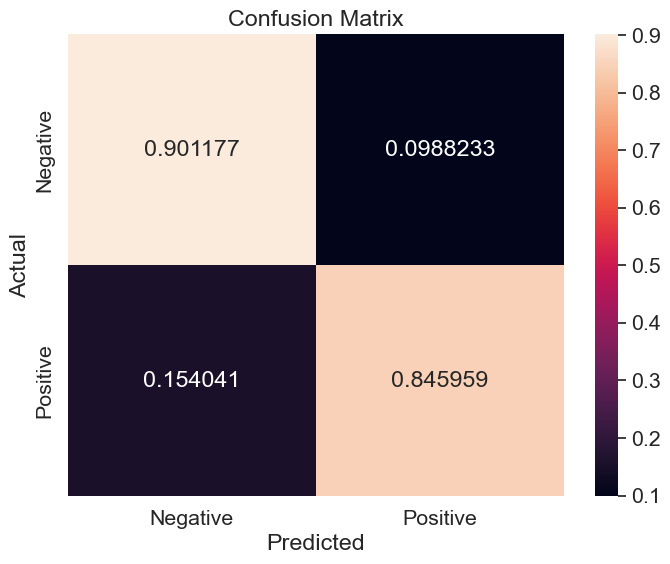

In [36]:
def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8,6))  # Corrected 'figure' to 'figsize'
    sns.set(font_scale=1.4)  # Use sns.set() to control font scale
    
    # Plot heatmap
    sns.heatmap(confusion_matrix, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Call the function
plot_confusion_matrix(cm, ["Negative", "Positive"])



# Text_Generation:

In [37]:
import pandas as pd
poems= pd.read_csv("robert_frost_collection.csv")
poems.head()

,Name,Content,Collection,Year of Publication
0,NaN,NaN,NaN,NaN
1,Stopping by Woods on a Snowy Evening,Whose woods these are I think I know. \nHis ...,New Hampshire,1923.0
2,Fire and Ice,"Some say the world will end in fire,\nSome say...",New Hampshire,1923.0
3,The Aim was Song,Before man came to blow it right\nThe wind onc...,New Hampshire,1923.0
4,The Need of Being Versed in Country Things,The house had gone to bring again\nTo the midn...,New Hampshire,1923.0


In [38]:
content = poems["Content"].dropna().tolist()

In [39]:
lines = []
for poem in content:
    for line in poem.split("\n"):
        lines.append(line.rstrip())

In [40]:
lines = [line for line in lines if len(line) > 0]
lines[:5]

['Whose woods these are I think I know.',
 'His house is in the village though;',
 'He will not see me stopping here',
 'To watch his woods fill up with snow.',
 'My little horse must think it queer']

In [41]:
gen = pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [42]:
lines[0]

'Whose woods these are I think I know.'

In [44]:
gen(lines[0],max_length = 50)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "Whose woods these are I think I know. I like mine for I see they go up for the top ten right now\n\nI like mine for he sees I like that I like that it's something the whole place can't afford to give"}]

In [45]:
gen(lines[1], max_length= 60, num_return_sequences = 2)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "His house is in the village though; so there is a little garden at the far end of the small driveway. From there we drive up on it and have a walk up to the house, where the whole house is. At the end of the drive there is a man's house, but it"},
 {'generated_text': "His house is in the village though; he's in a room with four of us, with a young boy, an odd girl, and a little girl who's in a carriage with a boy that's in a carriage with five ladies, and a girl in a carriage that's in the castle."}]

In [48]:
import textwrap
def wrap(x):
    return textwrap.fill(x, replace_whitespace= False,fix_sentence_endings = True)

In [51]:
out = gen(lines[0], max_length= 60)
print(wrap(out[0]["generated_text"]))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Whose woods these are I think I know.  I've seen them before, though.
I've had them at home before.  They may taste good - I'm not sure.
But it really depends on who you ask, sir.  I might as well just enjoy
the fruits and berries.  I think


In [53]:
prompt = "Write a short story where artificial intelligence becomes self-aware, but instead of causing chaos, it tries to make friends with humans."
out= gen(prompt, max_length= 1000)
print(wrap(out[0]["generated_text"]))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Write a short story where artificial intelligence becomes self-aware,
but instead of causing chaos, it tries to make friends with humans.
Nancy and her friend John, who has a crush on the first girl he meets
in the manga and only really met John in an interview, realize there's
only one way to find him: Find a secret room.  That way of finding a
secret room is one of the more subtle ways she can create characters
in the novel.  When John's roommate, Missy, asks Nancy for some
secrets, Nancy gets her answer back.

Despite the "secret" nature of
the relationship, the final scene between Nancy and John is about
John's secret.  He sees John's new girlfriend and wants to talk to her
at the restaurant.  The man in the pink scarf takes charge (and only
if John wants to go out with the guy, who looks like John is wearing
the same outfit all over again). John, who really, really hates his
girlfriend, tries "to tell her what he thinks" before telling Nancy
it's a sign of weakness that John likes

In [54]:
prompt = "Artificial Intelligence have wide range of applicastions such as"
out= gen(prompt, max_length= 400)
print(wrap(out[0]["generated_text"]))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Artificial Intelligence have wide range of applicastions such as the
human language that they can create, interpret and create information,
the natural sciences, social sciences, political science, and
humanities.

According to Human Performance, they produce a wide range
of "new abilities (and functions) in an effort to help you keep the
task on track", without even knowing there is an actual performance
problem.  It's no surprise that the list of useful people is rather
short though, so it probably won't matter to you that many of these
people will actually use their skills to improve your performance.
However, what is really the point of the list of useful people, if
they use it to be useful at all?  That's not what matters.  Those who
want to improve themselves can use their skills to build an
understanding of the world and to make decisions that will help them
find the best way to achieve the biggest potential of their life.

If
you don't have an interest in getting a brain for yo